In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
headers = ['Vertex count','Average Edge count','Edge probability', 'One bridge determined time', 'One bridge random time', 'Two bridge random time']

def preprocess_data(data):
    data = data[data['Average Edge count'] > 0.1]
    ranges = []
    orig_data = data
    for i in range(10):
        data = orig_data[orig_data['Edge probability'] > (0.09 + i * 0.1)]
        data = data[data['Edge probability'] < (0.11 + i * 0.1)]
        ranges.append(data)
    return ranges


In [19]:
def show_plot(i, df):
    x = df['Average Edge count']
    xx = df['Vertex count']
    one_fast = df['One bridge determined time']
    one_random = df['One bridge random time']
    two_random = df['Two bridge random time']
    plt.plot(xx,one_fast, label='Fast')
    plt.plot(xx,one_random, label='One randomized')
    plt.plot(xx,two_random, label='Two randomized')
    plt.legend()
    plt.title("Плотность {}".format(i/10.0))
    plt.show()

In [30]:
def print_result(file_path):
    data = pd.read_csv(file_path,names=headers)
    ranges = preprocess_data(data)
    for i, r in enumerate(ranges):
        if len(r) < 2:
            continue

        show_plot(i + 1, r)

## Отчет о лабораторной работе "Поиск мостов в графе"

Ниже приведены графики зависимости времени работы алгоритмов от количества вершин. \
Для проведения экспериментов использовался компьютера с следующими характеристиками: \
OS: Linux Ubuntu 18 \
CPU: Intel® Core™ i7-7800X CPU @ 3.50GHz × 12 \
RAM: 32 GB DDDR4 \
Compiler: GCC-7

Для обхода в глубину использовалась нерекурсивная реализация.  

Все методы были покрыты тестами, включающими unit тестирование, cross тестрирование и stress тестирование  

Начиная с 25-30 тысяч вершин график становится линейно зависм от количества вершин (в рамках одной плотности). 
Нелинейность в начале графика может быть связана с особенностями работы современных компьютеров, т.к. начиная с некторого объема данные данные перестают помещаться в кэш целиком и время работы выравнивается.   
  
Выбросы на графике могут быть связаны с тем, что на машине, на которой выполнялись эксперименты, работали и другие программы, которые могли забирать себе процессорное время.  

Блочная сортировка, реализованная наивным, показала наихудший результат. Реализация поразрядной сортировки низкоуровневыми средствами языка не показала значительного улучшения производительности, ввиду хорошей базовой оптимизации компилятором высокоуровневой функции.  

Использование 32 разрядных чисел для нахождения мостов рандомизированным алгоритмом позволило значительно снизить время работы алгоритма и количество потребляемой памяти, однако в ходе тестирования в 1.3% случаев были найдены ошибки в работе алгоритма.
  
Данные выводы будут также верны и для последующих реализаций.  

Также, в рамках лабораторной, был проведен дополнительный эксперимент. Код был скомпилирован с помощью clang compiler. Для Linux системы алгоритм показал деградацию производительности в пределах 5-30%. Причинами этого могут быть плохая оптимизация под используюмую платформу.  


## График времени работы 
Сортировка - поразрядная  
Обход в глубину - реализация через стек  
Количество бит для рандомизированного алгоритма - 64  

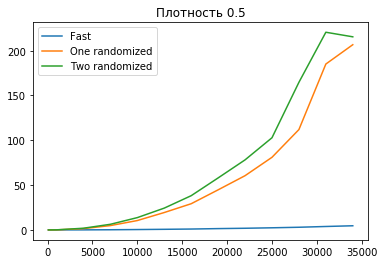

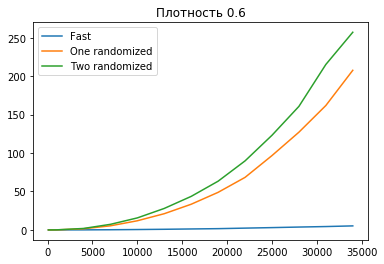

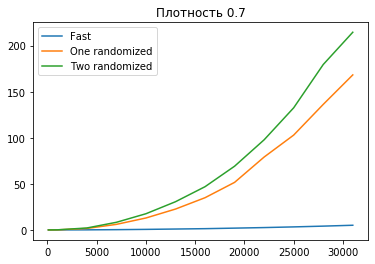

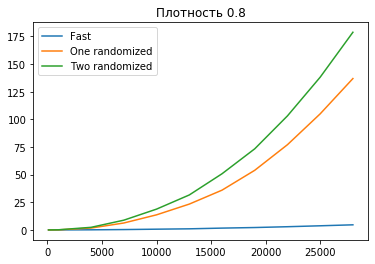

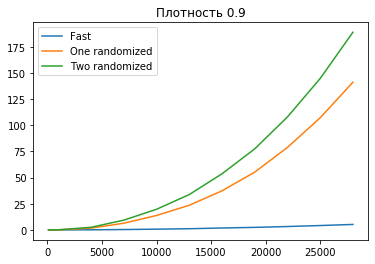

In [36]:
print_result('/home/kmolchan/Private/Bridges/radix_stack_64.txt')

## График времени работы 
Сортировка - стандартная (gcc-7)  
Обход в глубину - реализация через стек  
Количество бит для рандомизированного алгоритма - 64  

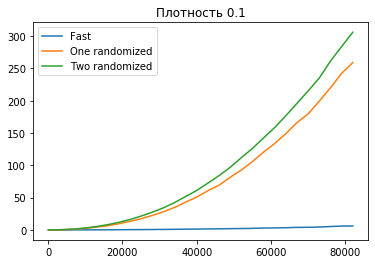

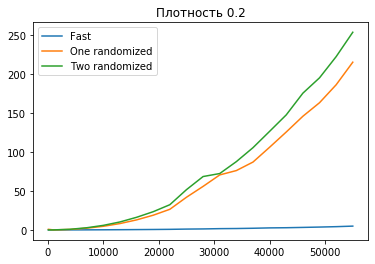

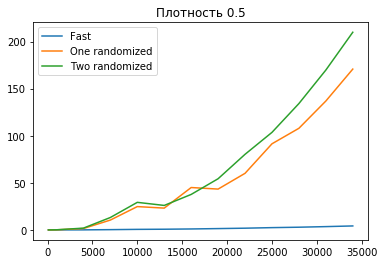

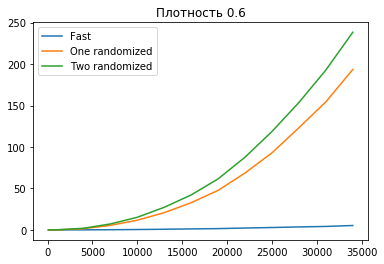

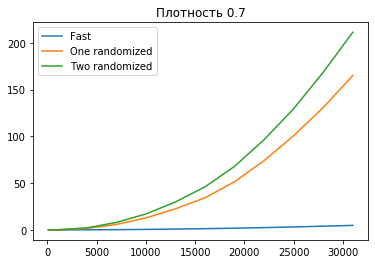

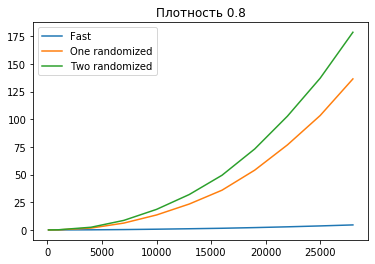

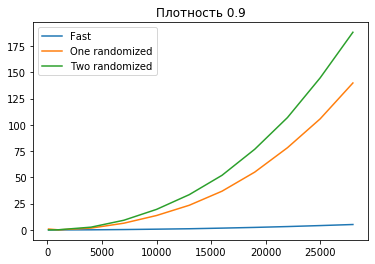

In [37]:
print_result('/home/kmolchan/Private/Bridges/std_stack_64.txt')

## График времени работы 
Сортировка - стандартная (gcc-7)  
Обход в глубину - реализация через стек  
Количество бит для рандомизированного алгоритма - 64  

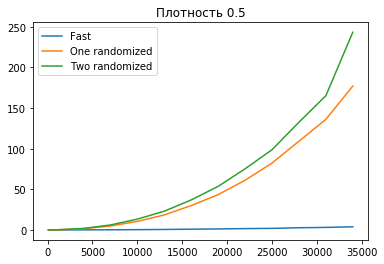

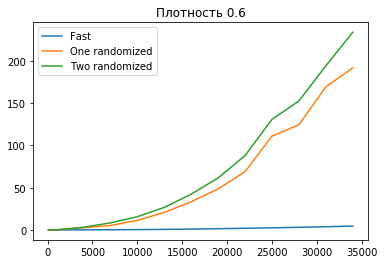

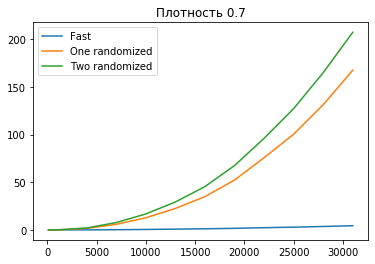

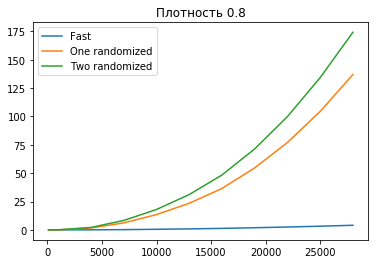

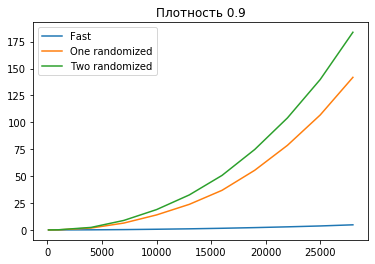

In [38]:
print_result('/home/kmolchan/Private/Bridges/radix_stack_32.txt')

## График времени работы 
Сортировка - стандартная (gcc-7)  
Обход в глубину - реализация через стек  
Количество бит для рандомизированного алгоритма - 64  

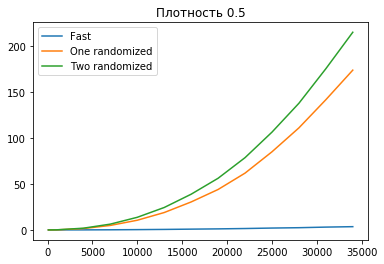

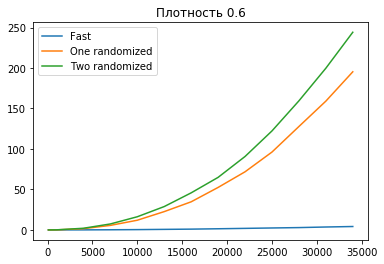

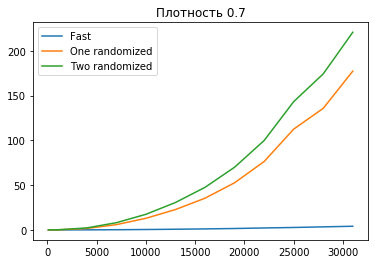

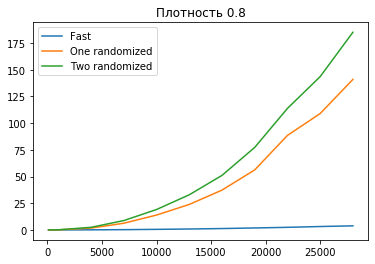

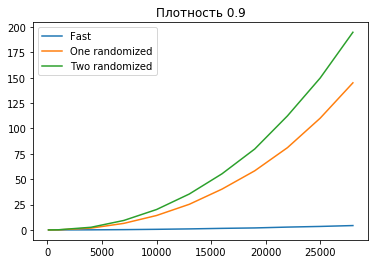

In [39]:
print_result('/home/kmolchan/Private/Bridges/std_stack_32.txt')